<center>
<img src="https://avatars.mds.yandex.net/i?id=08831819d2b500822a90327ea7aee923ef8a5322-9154878-images-thumbs&n=13" height="250">

# Андан на экономе: домашнее задание 3
</center>


> Bicycle bicycle bicycle  <br> I want to ride my bicycle <br> I want to ride my bike <br> I want to ride my bicycle <br>  I want to ride it where I like

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Bicycle Race (Queen)](https://www.youtube.com/watch?v=r2lT4oE4DxE)**

## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 19.05.2024

__Жесткий дедлайн:__ 23:59MSK 26.05.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [346]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Спрос на велосипеды

В этой домашке мы будем работать с данными о спросе на велосипеды. Мы научимся его предсказывать.

In [347]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/bikes_rent.csv')
print(df.shape)
df.head( )

(731, 13)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,4.8055,985
1,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,7.4439,801
2,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,7.4371,1349
3,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,4.8010,1562
4,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,5.5978,1600


__Описание переменных:__

* `season`  1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`  0 - 2011, 1 - 2012
* `mnth`  от 1 до 12
* `holiday`  0 - нет праздника, 1 - есть праздник
* `weekday`  от 0 до 6
* `workingday`  0 - нерабочий день, 1 - рабочий день
* `weathersit`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`  температура в Цельсиях
* `atemp`  температура по ощущениям в Цельсиях
* `hum`  влажность
* `windspeed(mph)`  скорость ветра в милях в час
* `windspeed(ms)`  скорость ветра в метрах в секунду
* `cnt`  количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [348]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии
    """

    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

## 1. EDA

__а) [5 баллов]__ Проверьте, есть ли в данных пропуски

In [349]:
df.isna().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

__б) [5 баллов]__ Составьте список из категориальных переменных и список из действительных переменных.

In [350]:
var_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

var_real = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

target = 'cnt'

__в) [5 баллов]__ Нарисуйте гистограмму для целевого признака. Что можете сказать о его хвосте? Надо ли предпринять какие-нибудь манипуляции, связанные с борьбой с выбросами?

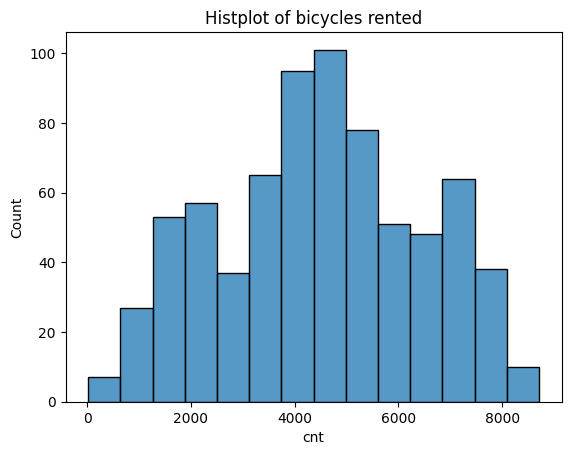

In [351]:
sns.histplot(df, x=target)
plt.title('Histplot of bicycles rented')
plt.show()

__Ответ:__  Выбросы отсутствуют, но есть пики в хвостах

__г) [5 баллов]__ Давайте посмотрим на то, как переменные коррелируют с таргетом. Для этого постройте соответствующую облака рассеивания.

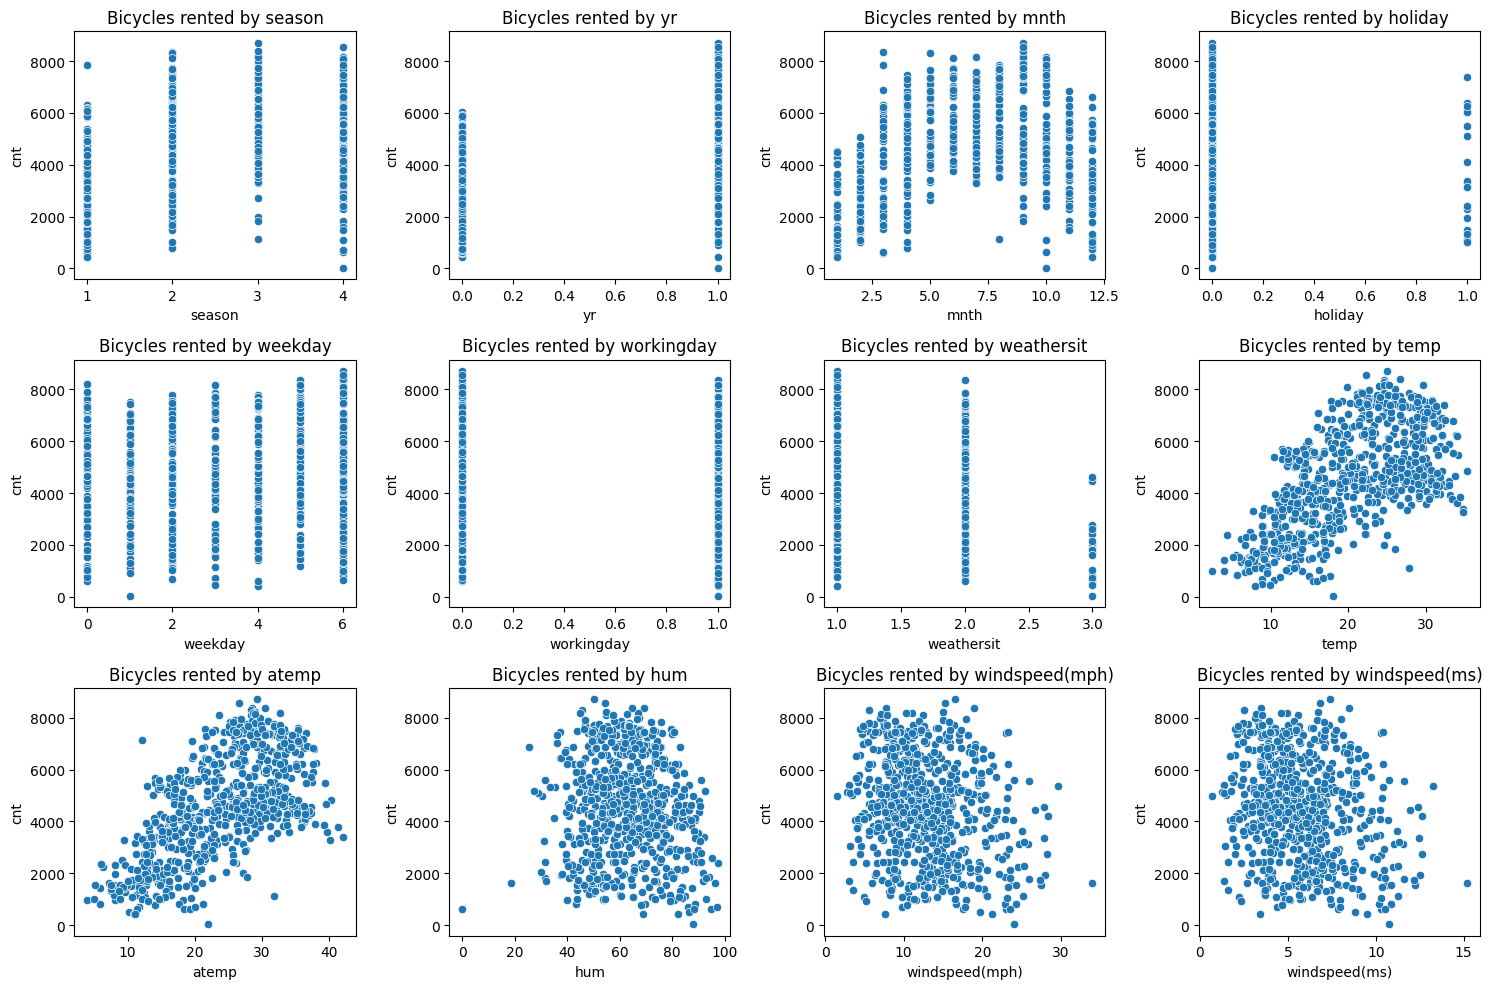

In [352]:
fig, axs = plt.subplots(figsize=(15,10), nrows=3, ncols=4)
axs = axs.flatten()

for ax, column in zip(axs, df.drop([target], axis=1).columns):
    sns.scatterplot(df, x=column, y=target, ax=ax)
    ax.set_title(f'Bicycles rented by {column}')

fig.tight_layout()
plt.show()

__д) [5 баллов]__ Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно?

__Ответ:__  Число прокатов в зависимости от месяца выглядит как рассеянная U-образная функция ветвями вниз. Также кажется, что есть прямая линейная связь между числом прокатов и температурами temp и atemp

__е) [5 баллов]__ Постройте гистограммы для всех непрерывных переменных. Что можете сказать о выбросах?

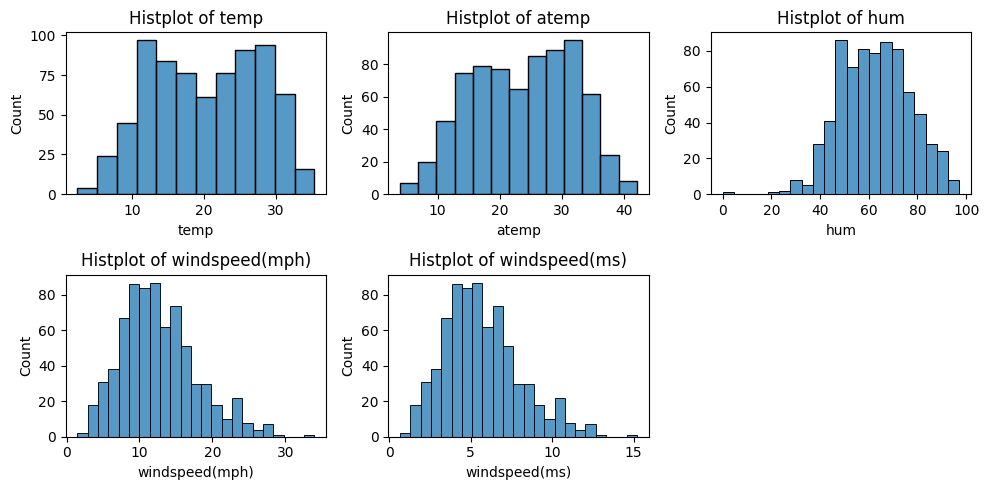

In [353]:
fig, axs = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axs = axs.flatten()

for ax, column in zip(axs, var_real):
    sns.histplot(df, x=column, ax=ax)
    ax.set_title(f'Histplot of {column}')

axs[-1].remove()

fig.tight_layout()
plt.show()

Кажется, что есть выбросы в признаках hum и в обоих windspeed

__ж) [5 баллов]__ Постройте между непрерывными признаками корреляционную матрицу. Нарисуйте её. Какие признаки, скорее всего, неинформативны? Почему они на ваш взгляд такие?

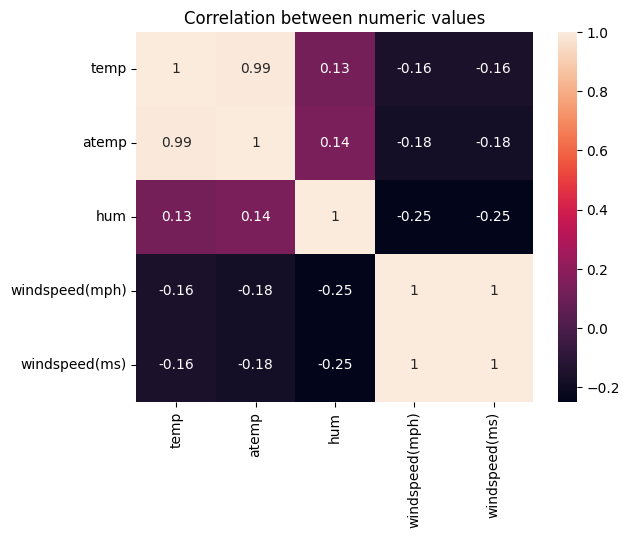

In [354]:
sns.heatmap(df[var_real].corr(), annot=True)
plt.title('Correlation between numeric values')
plt.show()

__Ответ:__ Думаю, что неинформативны такие признаки, как atemp и один из windspeed. Между atemp и temp есть сильная корреляция, поэтому можно выкинуть более "неточный" признак - atemp, а между windspeed связь линейная - одно прямо выражается через другое и отличается только единицей измерения, поэтому выкинем более непривычный признак - windspeed(mph)

__з) [5 баллов]__ Постройте для всех категориальных переменных _countplot_. Что интересного вы видите в распределеии этих признаков?  Встречаются ли слишком обширные категории, в которых очень маленькие части нам придётся объединять в категорию "другое"?

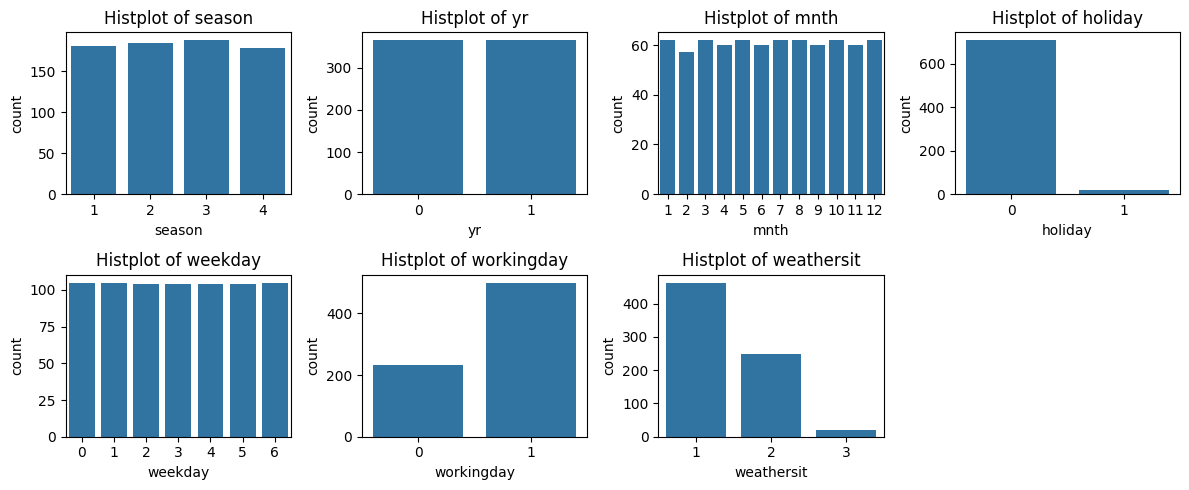

In [355]:
fig, axs = plt.subplots(figsize=(12,5), nrows=2, ncols=4)
axs = axs.flatten()

for ax, column in zip(axs, var_cat):
    sns.countplot(df, x=column, ax=ax)
    ax.set_title(f'Histplot of {column}')

axs[-1].remove()

fig.tight_layout()
plt.show()

__Ответ:__  В целом таких обширных категорий не встречается. Везде всё распределено равномерно, кроме holiday, workingday и weathersit

__и) [5 баллов]__  Сделайте OHE-кодирование. Сколько свежих OHE-признаков у нас появилось?

In [356]:
df = pd.get_dummies(df, columns=var_cat)

print(f'Появилось {df.shape[1] - 13} новых признаков')

Появилось 25 новых признаков


__к) [5 баллов]__   Некоторые из наших переменных могут вносить в спрос на велики квадратичный вклад. Например, температура.

Сначала, когда температура возрастает, люди выходят кататься охотнее, а потом, когда становится жарко, спрос резко падает. Так возникает параболическая зависимость.

Создайте для каждой действительной переменной из данных дополнительную переменную: её квадрат.

In [357]:
df[list(np.char.add(np.array(var_real), '_square'))] = df[var_real] ** 2

In [358]:
df.head()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,season_1,season_2,season_3,season_4,...,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp_square,atemp_square,hum_square,windspeed(mph)_square,windspeed(ms)_square
0,14.1108,18.1812,80.5833,10.7499,4.8055,985,True,False,False,False,...,True,False,False,True,False,199.1160,330.5579,6493.6682,115.5600,23.0927
1,14.9026,17.6869,69.6087,16.6521,7.4439,801,True,False,False,False,...,True,False,False,True,False,222.0874,312.8282,4845.3711,277.2929,55.4124
2,8.0509,9.4703,43.7273,16.6367,7.4371,1349,True,False,False,False,...,False,True,True,False,False,64.8174,89.6856,1912.0768,276.7799,55.3099
3,8.2000,10.6061,59.0435,10.7398,4.8010,1562,True,False,False,False,...,False,True,True,False,False,67.2400,112.4894,3486.1349,115.3440,23.0496
4,9.3052,11.4635,43.6957,12.5223,5.5978,1600,True,False,False,False,...,False,True,True,False,False,86.5874,131.4118,1909.3142,156.8080,31.3355


__л) [5 баллов]__  Попробуйте придумать ещё какую-нибудь новую фичу (дополнительную переменную) для прогнозирования. Опишите какая за вашей фичёй стоит интуиция и почему это должно сработать при моделировании.

In [359]:
df['hurricane_coef'] = df['windspeed(ms)'] * df['hum']

Добавим произведение скорости ветра на влажность - оно должно "численно" отражать погодные условия. Если оба показателя высокие - высока вероятность, что за окном шторм - в таких наблюдениях weathersit должнен быть равен трём. При маленьком значении какой-либо компоненты значение переменной будет более низким, что также отражает, насколько тяжёлыми являются погодные условия.

## 2. Обучение модели

__а) [10 баллов]__  Разбейте выборку на тренировочную и тестовую.

In [360]:
from sklearn.model_selection import train_test_split

df = df.rename(str, axis='columns')

X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.3, random_state=0)

__б) [10 баллов]__ Возьмите RMSE в качестве метрики качества. Для этого нужно написать свою функцию. Постройте наивный прогноз (среднее) и найдите для него RMSE.

In [361]:
def RMSE(y_true, y_pred):
    return ((np.sum((y_true - y_pred) ** 2)) / len(y_true)) ** 0.5

In [362]:
y_naive = np.mean(y_train)

print('Train', RMSE(y_train, y_naive))
print('Test', RMSE(y_test, y_naive))

Train 1892.9852128025684
Test 2032.2607189960986


__в) [5 баллов]__ Запустите код с разбиением выборки на тренировочную и тестовую, подсчётом наивного прогноза и RMSE по нему несколько раз. НЕ НАДО НИЧЕГО КОПИРОВАТЬ. ПРОСТО ПЕРЕЗАПУСТИТЕ КОД ТРИ РАЗА. Меняется ли RMSE? Почему оно меняется? К чему плохому это может привести при обучении? Как это обычно исправляют?

__Ответ:__  RMSE меняется, потому что каждый раз берётся разная выборка и среднее значение выборки оказывается смещенным относительно истинного среднего значения. Это может привести к необъективной оценке модели в случае "попадания" в нерепрезентативную выборку. Исправляется это кросс-валидацией, чтобы исключить вероятность попадания в плохую выборку и улучшить качество оценки модели.

Я оставлю в обучении random_state=0 для фиксирования результатов.

__г) [10 баллов]__ Оцените линейную регрессию. Насколько удалось улучшить качество прогнозирования в сравнении с наивным прогнозом?  Визуализируйте прогнозы функцией `plot_yreal_ypred`.

Что вы видите на этой визуализации? Проинтерпретируйте картинку.

__Ответ:__ На визуализации виден scatterplot, показывающий различия между предсказанными и истинными значениями. Синяя линяя показывает равенство предсказанного значения и истинного. Чем дальше красная точка от синей линии - тем больше модель ошиблась в предсказании. Видно, что данные не особо кучно лежат вокруг синей линии, особенно на test set.

In [363]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print('Train', RMSE(y_train, y_train_pred))
print('Test', RMSE(y_test, y_test_pred))

Train 674.3035194111437
Test 723.3352331596287


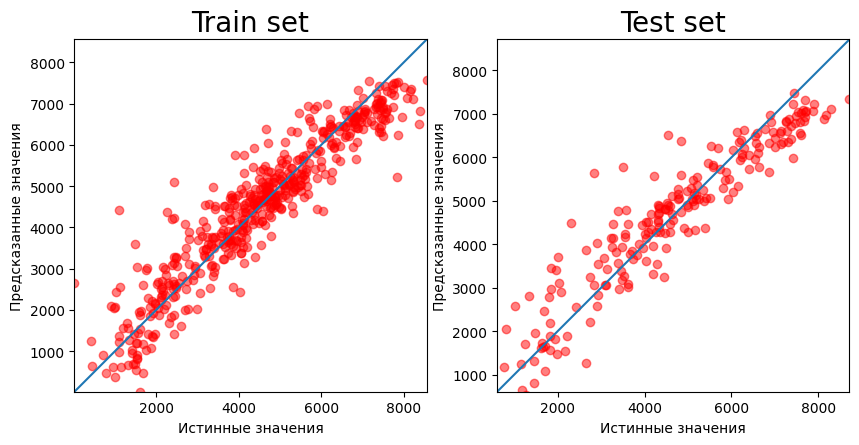

In [364]:
plot_yreal_ypred(y_test, y_train, y_test_pred, y_train_pred)

__д) [10 баллов]__ Какими получились значения перед коэффициентами у вашей модели?  Как думаете, почему такое произошло?

__Ответ:__  Коэффициенты получились большие (10 ** 8-13), это произошло из-за переобучения модели.

In [365]:
reg.coef_, reg.intercept_

(array([648.49, -184.07, 108.48, 9769435692667.87, -21854227644206.70,
        182194983963.54, 182194984828.81, 182194985226.07, 182194985522.64,
        40079822393.68, 40079824260.56, 8673381862.01, 8673381547.51,
        8673381782.92, 8673381558.98, 8673381970.95, 8673381838.31,
        8673381644.28, 8673381709.03, 8673382005.98, 8673381525.14,
        8673380927.10, 8673381213.89, -720077007.42, 9214237932.31,
        18501743287.30, 8567428102.23, 8567428193.33, 8567428271.71,
        8567428304.61, 8567428304.81, 18501743605.46, -17741740003.25,
        -7807424725.31, 20736925421.26, 20736925161.05, 20736924534.37,
        -12.94, 3.34, -0.88, -137179609447.65, 686469949016.23, -3.90]),
 -251725044908.45023)

## 3. Бонус

__a) [2 балла]__ Обучите Lasso-регрессию. В качестве силы регуляризации возьмите $\alpha = 40$.

* Каким получилось качество прогноза?
* Что в модели произошло с коэффициентами?  

In [366]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=40)
lasso.fit(X_train, y_train)

print('Train', RMSE(y_train, lasso.predict(X_train)))
print('Test', RMSE(y_test, lasso.predict(X_test)))

Train 755.7498999402701
Test 833.2225418279849


In [367]:
lasso.coef_, lasso.intercept_

(array([478.30, 0.00, 102.95, 80.11, 0.00, -537.03, -0.00, 0.00, 120.61,
        -1667.35, 0.00, 0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00,
        0.00, 19.72, 0.00, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00,
        0.00, 0.00, 0.00, 0.00, -0.00, 0.00, 0.00, -0.00, -0.00, -7.87,
        -0.56, -0.91, -1.83, -0.00, -3.41]),
 -2419.2749046083336)

__Ответ:__   Качество модели ухудшилось, большинство коэффициентов занулились

__б) [0 баллов]__  Изучите код в этом пункте и прочитайте выводы. Подумайте об этом.

В случае линейных моделей, обычно, используют два вида регуляризации: Ridge и Lasso. Первая прибавляет к MSE квадраты коэффицентов, а вторая модули. Давайте посмотрим какая между ними разница.

In [368]:
from sklearn.linear_model import Lasso, Ridge  # подгружаем модели

Обучим много-много моделей с разными силами регуляризации $\alpha$ и посмотрим что получится.

In [369]:
alphas = np.arange(0, 50, 1)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X_train.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X_train.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X_train,y_train)
    ls.fit(X_train,y_train)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

<ipython-input-369-63c41c131572>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ls.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+08, tolerance: 1.831e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklea

В отличие от L2-регуляризации (Ridge), L1 (Lasso) обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

Text(0.5, 1.0, 'Ridge')

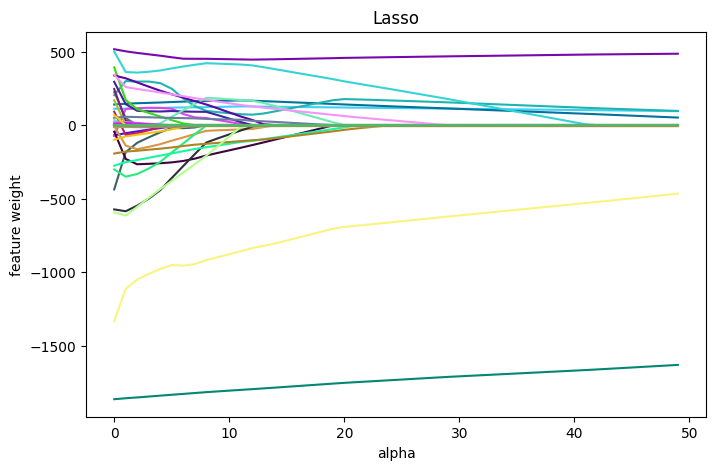

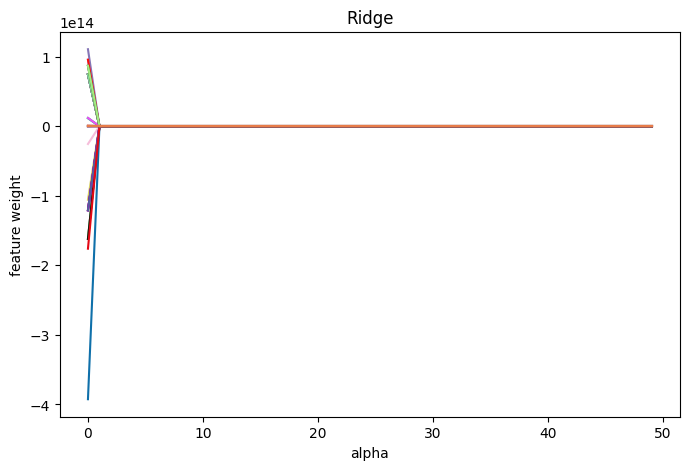

In [370]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.drop([target], axis=1).columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
#plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.drop([target], axis=1).columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
#plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Картинки вышли красивыми. Обратите внимание, что регуляризатор Lasso агрессивнее уменьшает веса. Подумайте с чем это связано. Если делать `alpha` очень большим, веса зануляются. В случае Ridge такого не происходит. Веса становятся всё ближе к нулю, но зануления не происходит.  Из-за того, что Lasso зануляет некоторые признаки, его можно использовать для отбора самых важных признаков. Дальше будем работать именно с ним.

Итак, мы видим, что при изменении `alpha` модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее `alpha`. Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть MSE (Mean Square Error).

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую, то настроимся на конкретные "новые" данные, и вновь можем переобучиться.

Именно такую настройку вы наблюдали выше, когда запускали код с наивным прогнозом много раз подряд. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения `alpha`, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку.

Подбирать параметр `alpha` в `sklearn` совсем просто: для этого есть `GridSearchCV`. Мы уже сталкивались с примером применения этой функции на семинаре. Попробуйте с помощью неё перебрать список из альф и подыскать оптимальное. Параметр cv отвечает за то, на сколько частей делится выборка. Поставьте `cv=5`. Также укажите параметр `scoring = neg_mean_squared_error`. Это задаст функцию потерь, на которую будет ориентироваться `GridSearchCV` при переборе. Назовите переменную, в которой будет находиться перебор __grid_cv_lasso.__

__в) [2 балла]__ Подберите для Lasso-регрессии с помощью поиска по решётке оптимальное значение $\alpha$.  Каким оказалось это значение?


Получилось alpha=3:

In [371]:
from sklearn.model_selection import GridSearchCV

ls = Lasso()
grid_cv_lasso = GridSearchCV(ls, [{"alpha": alphas}], scoring='neg_mean_squared_error', cv=5)
grid_cv_lasso.fit(X_train, y_train)

best_alpha = grid_cv_lasso.best_params_['alpha']
best_alpha

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.376e+07, tolerance: 1.468e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

3

__г) [2 балла]__ Каким получается качество прогноза для модели с оптимальным значением $\alpha$?

In [372]:
from sklearn.metrics import mean_squared_error

lasso_best_alpha = Lasso(alpha=best_alpha)
lasso_best_alpha.fit(X_train, y_train)


print('MSE:')
print('Train', mean_squared_error(y_train, lasso_best_alpha.predict(X_train)))
print('Test', mean_squared_error(y_test, lasso_best_alpha.predict(X_test)))

print('RMSE:')
print('Train', RMSE(y_train, lasso_best_alpha.predict(X_train)))
print('Test', RMSE(y_test, lasso_best_alpha.predict(X_test)))

MSE:
Train 462810.51214506564
Test 534964.7416950149
RMSE:
Train 680.3017802013057
Test 731.4128394381759


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.049e+08, tolerance: 1.831e+05
  model = cd_fast.enet_coordinate_descent(


__д) [2 балла]__ Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Проинтерпретируйте последнюю обученую модель. У каких признаков наибольшие положительные коэфициенты? У каких наибольшие отрицательные? Логично ли утверждать, что чем больще/меньше эти признаки, тем выше/ниже спрос на велосипеды? Какие коэффициенты занулились?

In [373]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) # https://www.itcodar.com/python/converting-exponential-to-float.html

coefs = pd.DataFrame({'parameter': df.drop(target, axis=1).columns, 'coefs': lasso_best_alpha.coef_})
coefs['coefs'] = coefs['coefs'].astype(float)
coefs

,parameter,coefs
0,temp,480.9810
1,atemp,-30.8312
2,hum,115.3741
3,windspeed(mph),151.2364
4,windspeed(ms),0.0000
5,season_1,-1010.8785
6,season_2,-83.2488
7,season_3,117.8416
8,season_4,296.1566
9,yr_0,-1843.3787


__Ответ:__  Наибольшие по модулую поэфты у таких признаков, как temp, season_1, season_4, yr_0, некоторые месяца, первые два дня недели, weathersit_1, weathersit_3. При этом видно, что спрос от температуры зависит квадратично: от квадрата температуры спрос отрицательный, а от температуры в степени 1 - положительный. Очень странно, что такая сильная зависимость от yr_0, и также странно, что зависимость от atemp отрицательная.

__е) [2 балла]__ В прошлой домашке, когда мы придумывали фичи, мы предположили, что спрос на велосипеды зависит от скорости ветра квадратично, по параболе. Подтвердилось ли это предположение?

__Ответ:__  В целом да, можно так сказать, поскольку коэффициент при квадрате не близок к нулю, как и у температуры. С другой стороны эти коэффициенты на порядок или даже на несколько порядков меньше, чем остальные.